In [2]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import sklearn as sk
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
%matplotlib inline
warnings.simplefilter('ignore')

In [3]:
mr = pd.read_csv('mushrooms.csv')
mr.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
mr.shape 

(8124, 23)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,...,2,7,7,0,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,3,3


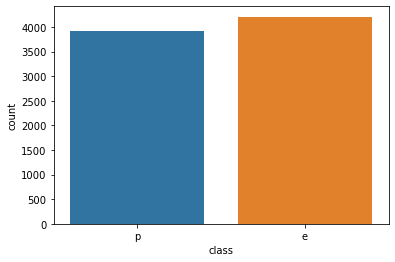

In [5]:
drop_mr = mr.drop_duplicates()
drop_mr.shape

sns.countplot(data=mr, x='class')

mr.nunique()

for column in list(mr):
    mr[column] = pd.Series(LabelEncoder().fit_transform(mr[column]))

mr.head(10)

                             class  cap-shape  cap-surface  cap-color  \
class                     1.000000   0.052951     0.178446  -0.031384   
cap-shape                 0.052951   1.000000    -0.050454  -0.048203   
cap-surface               0.178446  -0.050454     1.000000  -0.019402   
cap-color                -0.031384  -0.048203    -0.019402   1.000000   
bruises                  -0.501530  -0.035374     0.070228  -0.000764   
odor                     -0.093552  -0.021935     0.045233  -0.387121   
gill-attachment           0.129200   0.078865    -0.034180   0.041436   
gill-spacing             -0.348387   0.013196    -0.282306   0.144259   
gill-size                 0.540024   0.054050     0.208100  -0.169464   
gill-color               -0.530566  -0.006039    -0.161017   0.084659   
stalk-shape              -0.102019   0.063794    -0.014123  -0.456496   
stalk-root               -0.379361   0.030191    -0.126245   0.321274   
stalk-surface-above-ring -0.334593  -0.030417     0

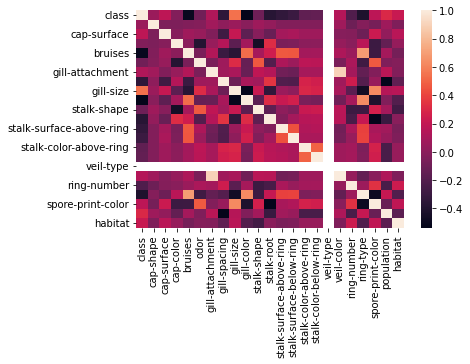

In [6]:
corr_matrix = mr.corr()
sns.heatmap(corr_matrix);
print(corr_matrix)

mr.drop('veil-type',axis= 1,inplace = True)

mr.isnull().sum()

data_X, data_Y = mr.drop(columns="class", axis=1).values, mr["class"].values
train_x, test_x, train_y, test_y = train_test_split(data_X, data_Y, test_size=0.3)

In [7]:
#1 – классификатор K ближайших соседей (задаётся количество ближайших объектов);
knn = KNeighborsClassifier()

search = GridSearchCV(knn, {'n_neighbors': [x for x in range(1, 50)]})
search.fit(train_x, train_y)

n = search.best_estimator_.n_neighbors# самое лучшее значение
best = search.best_score_# наивысший средний балл
print('best:', best, ', neighbors num:', n, sep=' ')

knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(train_x, train_y)
knn_predict = knn.predict(test_x)
print('Accuracy knn: %.5f' % accuracy_score(test_y, knn_predict))

best: 0.9992963940193492 , neighbors num: 1
Accuracy knn: 0.99918


In [8]:
#3 – линейный классификатор (персептрон);
ppn = Perceptron()

search = GridSearchCV(estimator=ppn, param_grid={
    'alpha': np.linspace(0, 1, 20)[1:],
    'max_iter': [x for x in range(1, 50)],
}, n_jobs=-1)
search.fit(train_x, train_y)# обучаем
alpha = search.best_estimator_.alpha
max_iter = search.best_estimator_.max_iter
best = search.best_score_
print('best:', best, 'alpha:', alpha, 'max_iter:', max_iter)

ppn = Perceptron(alpha=alpha, max_iter=max_iter)
ppn.fit(train_x, train_y)
ppn_predict = ppn.predict(test_x)
print('Accuracy ppn: %.5f' % accuracy_score(test_y, ppn_predict))# оцениваем точность



best: 0.9380893202442836 alpha: 0.05263157894736842 max_iter: 25
Accuracy ppn: 0.79696


In [9]:
test_y_inversion = [1-y for y in test_y]

prob_knn = knn.predict_proba(test_x)#прогназируем вероятности

cppn = CalibratedClassifierCV(ppn, cv=10)#Калибровка вероятности с помощью изотонической регрессии или логистической регрессии.
cppn.fit(train_x, train_y)
prob_ppn = cppn.predict_proba(test_x)

def addPlotPr(prob, occupancy, label, test):
    precision, recall, _ = precision_recall_curve(test, prob[:, occupancy])#Вычислим пары точности-отзыва для пороговых значений вероятности.
    aps = average_precision_score(test, prob[:, occupancy])#Вычислим среднюю точность из оценок прогнозов.
    plt.plot(recall, precision, label='%s PR (area = %f)' % (label, aps))

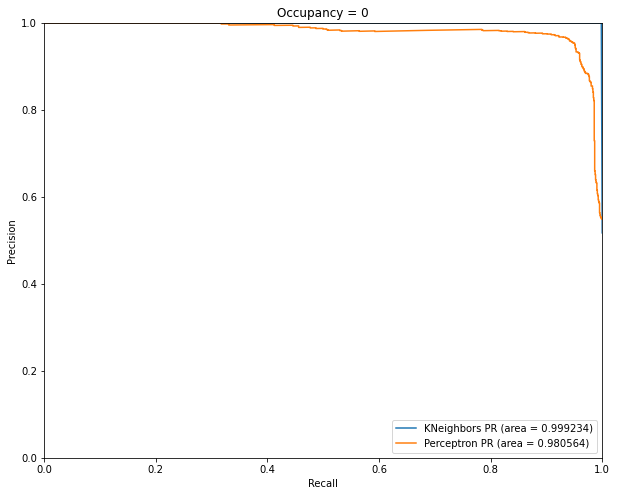

In [10]:
plt.figure(figsize=(10,8))

addPlotPr(prob_knn, 0, 'KNeighbors', test_y_inversion)
addPlotPr(prob_ppn, 0, 'Perceptron', test_y_inversion)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Occupancy = 0')
plt.legend(loc=4, fontsize='medium')
plt.show()

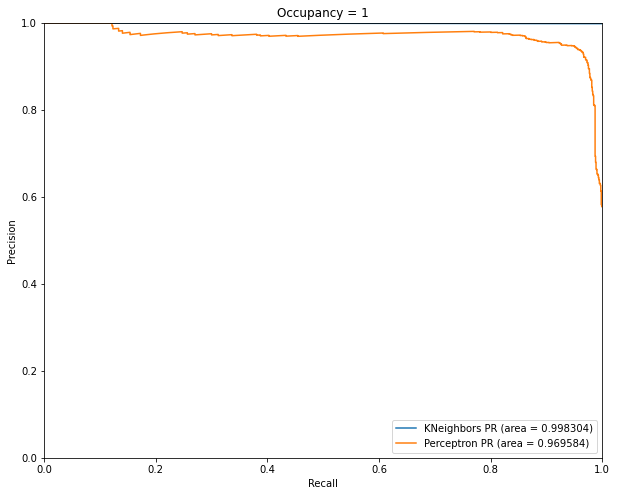

In [11]:
plt.figure(figsize=(10,8))

addPlotPr(prob_knn, 1, 'KNeighbors', test_y)
addPlotPr(prob_ppn, 1, 'Perceptron', test_y)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Occupancy = 1')
plt.legend(loc=4, fontsize='medium')
plt.show()

In [12]:
def addPlotRoc0(prob, label, test):
    tpr, fpr, _ = roc_curve(test, prob[:, 0])#Вычислить рабочую характеристику приемника
    roc_auc  = auc(fpr, tpr)#Вычисляем площадь под кривой
    plt.plot(fpr, tpr, label='%s ROC (area = %f)' % (label, roc_auc)) 

def addPlotRoc1(prob, label, test):
    fpr, tpr, _ = roc_curve(test, prob[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %f)' % (label, roc_auc))

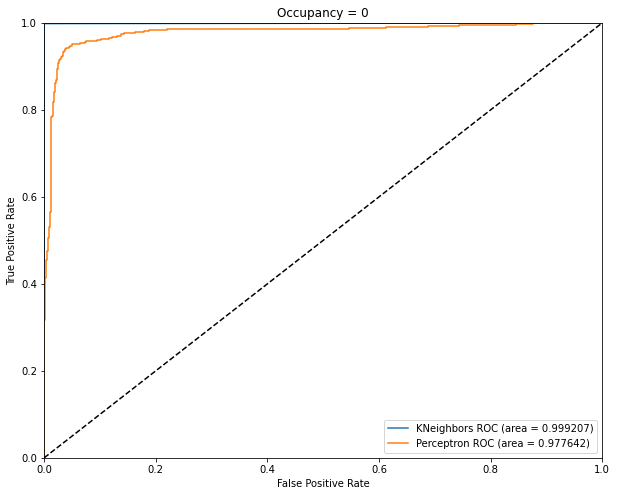

In [13]:
plt.figure(figsize=(10,8))

addPlotRoc0(prob_knn, 'KNeighbors', test_y)
addPlotRoc0(prob_ppn, 'Perceptron', test_y)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('Occupancy = 0')
plt.show()


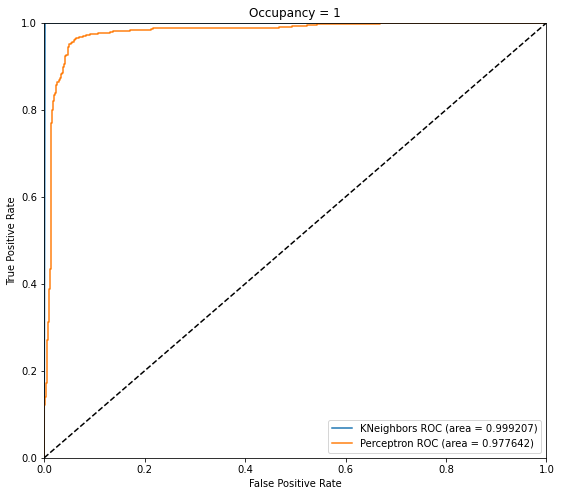

In [14]:
plt.figure(figsize=(9,8))

addPlotRoc1(prob_knn, 'KNeighbors', test_y)
addPlotRoc1(prob_ppn, 'Perceptron', test_y)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('Occupancy = 1')
plt.show()